# data preprocess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [2]:
data = pd.read_csv("./data/Credit.csv")

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [5]:
data.describe()
data.shape
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


In [6]:
data.drop('ID', axis=1, inplace=True) # drop the ID column

In [7]:
data.duplicated().sum() # check for duplicates

35

In [8]:
data.default.value_counts()

default
N    23364
Y     6636
Name: count, dtype: int64

In [9]:
data.SEX.value_counts()

SEX
F    18112
M    11888
Name: count, dtype: int64

In [10]:
data.EDUCATION.value_counts()

EDUCATION
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: count, dtype: int64

In [11]:
data.MARRIAGE.value_counts()

MARRIAGE
Single     15964
Married    13659
Other        323
0             54
Name: count, dtype: int64

In [12]:
import seaborn as sns

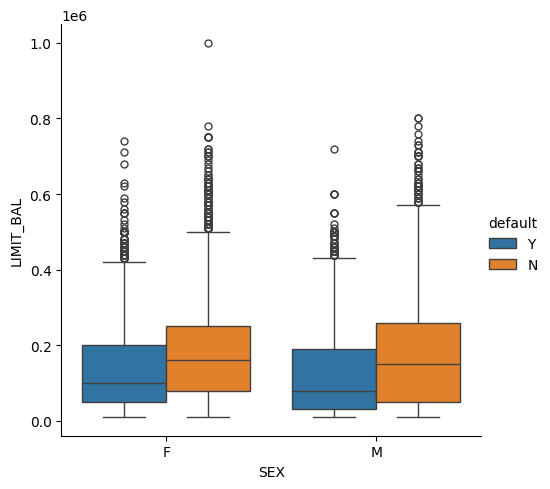

In [13]:
sns.catplot(x='SEX', y='LIMIT_BAL', hue='default', kind='box', data=data)

<Axes: >

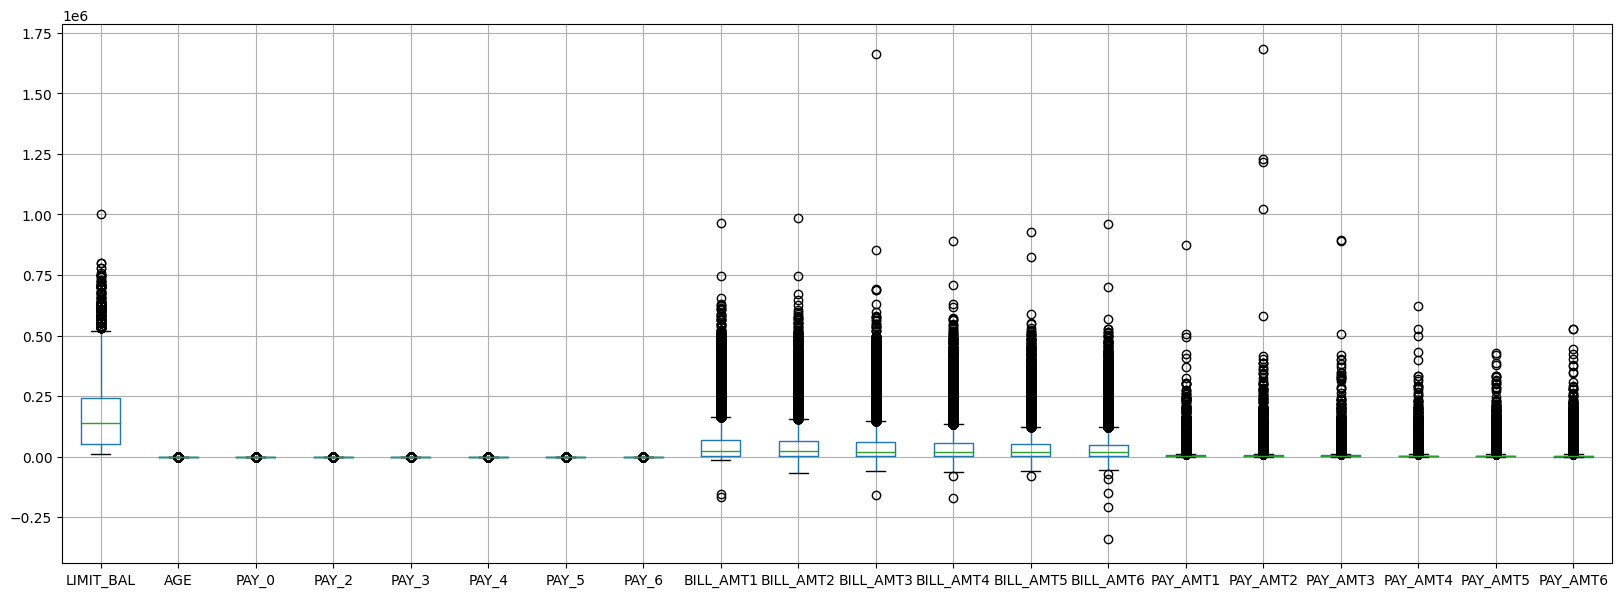

In [14]:
plt.figure(figsize=(20, 7))
data.boxplot()

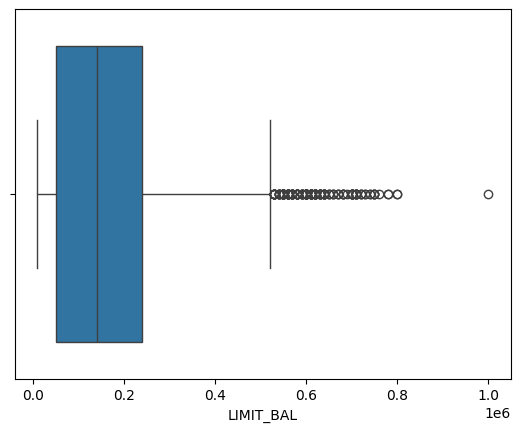

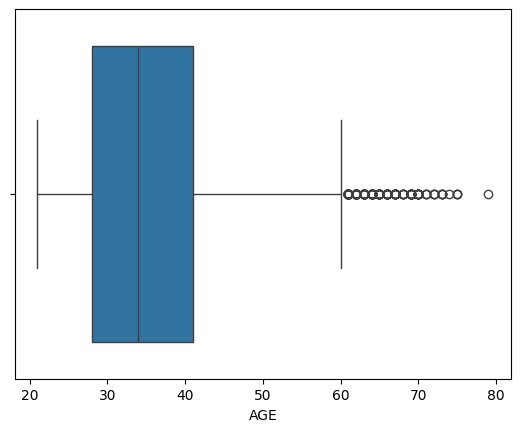

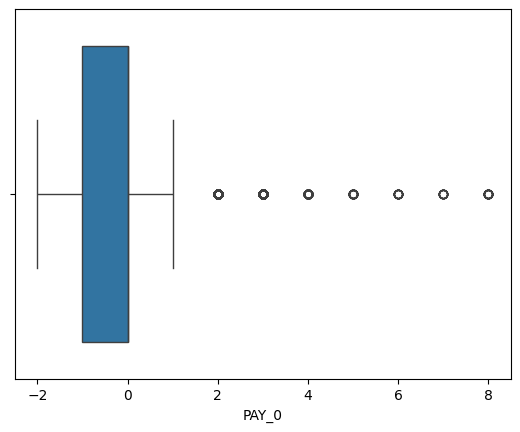

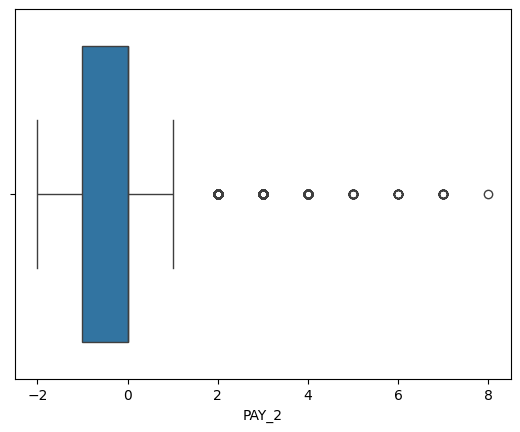

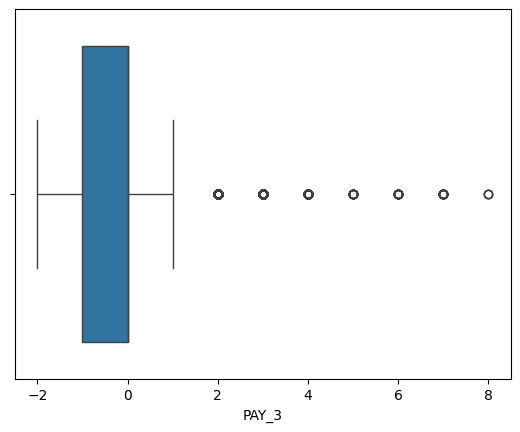

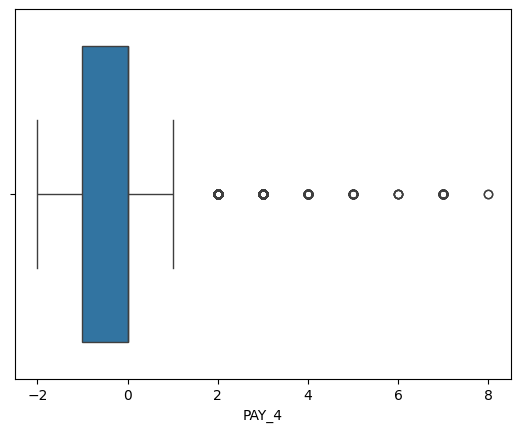

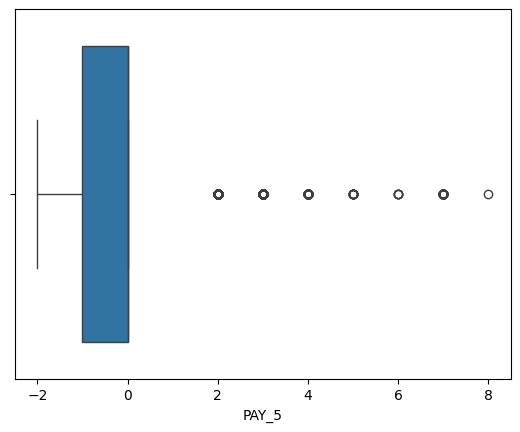

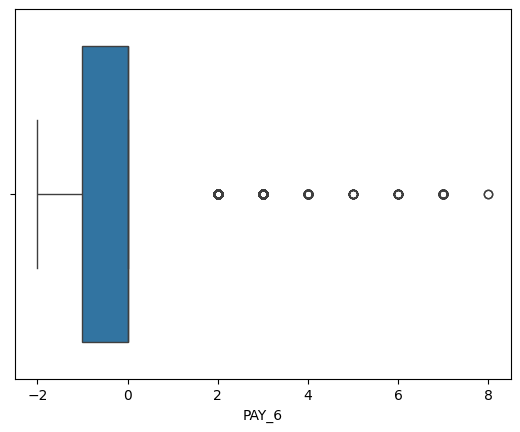

In [15]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0',
            'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for feature in features:
    sns.boxplot(x=feature, data=data)
    plt.show()

<Axes: xlabel='PAY_AMT1'>

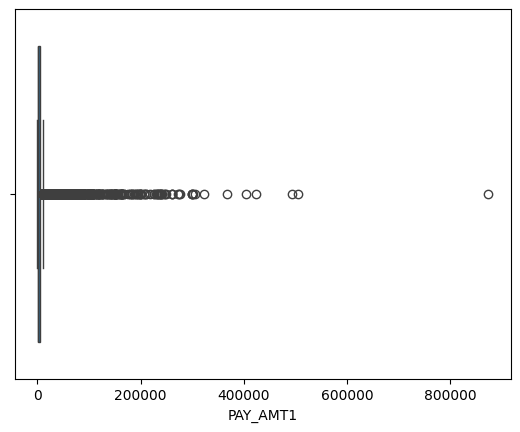

In [16]:
sns.boxplot(x='PAY_AMT1', data=data)

<Axes: xlabel='BILL_AMT1'>

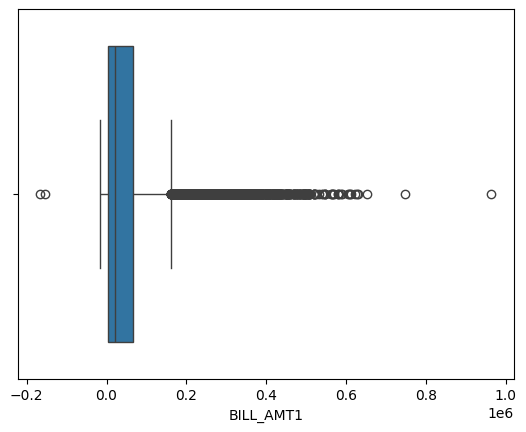

In [17]:
sns.boxplot(x='BILL_AMT1', data=data)

In [18]:
train = data[(data['AGE'] <= 60) & (data['PAY_0'] <=2) & (data['PAY_2'] <=2) & (data['PAY_3'] <=2) & (data['PAY_4'] <=2) & (data['PAY_5'] <=2) & (data['PAY_6'] <=2) & (data['LIMIT_BAL'] <=600000)]

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28470 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  28470 non-null  int64 
 1   SEX        28470 non-null  object
 2   EDUCATION  28470 non-null  object
 3   MARRIAGE   28470 non-null  object
 4   AGE        28470 non-null  int64 
 5   PAY_0      28470 non-null  int64 
 6   PAY_2      28470 non-null  int64 
 7   PAY_3      28470 non-null  int64 
 8   PAY_4      28470 non-null  int64 
 9   PAY_5      28470 non-null  int64 
 10  PAY_6      28470 non-null  int64 
 11  BILL_AMT1  28470 non-null  int64 
 12  BILL_AMT2  28470 non-null  int64 
 13  BILL_AMT3  28470 non-null  int64 
 14  BILL_AMT4  28470 non-null  int64 
 15  BILL_AMT5  28470 non-null  int64 
 16  BILL_AMT6  28470 non-null  int64 
 17  PAY_AMT1   28470 non-null  int64 
 18  PAY_AMT2   28470 non-null  int64 
 19  PAY_AMT3   28470 non-null  int64 
 20  PAY_AMT4   28470 non-null  int64 

In [20]:
train.default.value_counts()

default
N    22658
Y     5812
Name: count, dtype: int64

In [21]:
train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,M,University,Single,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,Y
29995,220000,M,High School,Married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,150000,M,High School,Single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,N
29998,80000,M,High School,Married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [22]:
train = pd.get_dummies(train, columns=['EDUCATION','MARRIAGE'], dtype=int, drop_first=True) # change education and marriage to categorical variables

In [23]:
encoders_nums = {
    "SEX": {"F": 0, "M": 1},
    "default": {"N": 0, "Y": 1},
}
train = train.replace(encoders_nums)

In [24]:
train

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,0,0,1,0,1,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,2000,1,0,0,0,1,0,0,0,1
2,90000,0,34,0,0,0,0,0,0,29239,...,5000,0,0,0,0,1,0,0,0,1
3,50000,0,37,0,0,0,0,0,0,46990,...,1000,0,0,0,0,1,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,679,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,1,34,2,2,2,2,2,2,72557,...,4000,1,0,0,0,1,0,0,0,1
29995,220000,1,39,0,0,0,0,0,0,188948,...,1000,0,0,1,0,0,0,1,0,0
29996,150000,1,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,1,0,0,0,0,0,1
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,1804,1,0,1,0,0,0,1,0,0


In [25]:
X = train.drop('default', axis=1)
y = train.default

In [26]:
y.value_counts()

default
0    22658
1     5812
Name: count, dtype: int64

In [27]:
columns = train.drop('default', axis=1).columns

In [28]:
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Graduate school',
       'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_University',
       'EDUCATION_Unknown', 'MARRIAGE_Married', 'MARRIAGE_Other',
       'MARRIAGE_Single'],
      dtype='object')

In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y) # make the x y balanced

In [30]:
y.value_counts()

default
1    22658
0    22658
Name: count, dtype: int64

In [31]:
X.value_counts()

LIMIT_BAL  SEX  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  EDUCATION_Graduate school  EDUCATION_High School  EDUCATION_Others  EDUCATION_University  EDUCATION_Unknown  MARRIAGE_Married  MARRIAGE_Other  MARRIAGE_Single
360000     0    36   -2     -2     -2     -2     -2     -2     0          0          0          0          0          0          0         0         0         0         0         0         1                          0                      0                 0                     0                  1                 0               0                  7
           1    41    1     -2     -2     -2     -2     -2     0          0          0          0          0          0          0         0         0         0         0         0         0                          0                      0                 1                     0                  1

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # scale the data to make it easier for the model to learn

In [33]:
X

array([[-1.10494165, -0.67807197, -1.33032759, ...,  1.29681822,
        -0.08204504, -0.87353459],
       [-0.29491679, -0.67807197, -1.09087713, ..., -0.7711181 ,
        -0.08204504,  1.14477436],
       [-0.53792425, -0.67807197, -0.1330753 , ..., -0.7711181 ,
        -0.08204504,  1.14477436],
       ...,
       [-1.18594414,  1.47476971, -0.49225098, ..., -0.7711181 ,
        -0.08204504,  1.14477436],
       [-1.10494165,  1.47476971, -0.37252575, ..., -0.7711181 ,
        -0.08204504, -0.87353459],
       [-1.02393917,  1.47476971,  0.34582562, ..., -0.7711181 ,
        -0.08204504, -0.87353459]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# logistic regression

In [35]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.5510849577050386


正則化是機器學習和統計模型中用於防止過擬合（overfitting）的一種技術。過擬合發生在模型過於複雜，以至於它開始捕捉訓練數據中的隨機噪聲而不是底層的數據分佈。正則化通過對模型增加一個懲罰項（penalty term）來解決這個問題，這有助於降低模型的複雜性，從而提高其泛化能力。

### **正則化的主要類型**

1. **L1 正則化（Lasso）**:
    - 在L1正則化中，懲罰項是模型權重的絕對值之和。
    - 公式表示為：損失函數 + λ * (Σ |w|)，其中 w 是模型權重，λ 是正則化強度。
    - L1 正則化有助於生成一個稀疏模型，其中一些權重變為零。這意味著它可以用於特徵選擇。
2. **L2 正則化（Ridge）**:
    - 在L2正則化中，懲罰項是模型權重的平方和。
    - 公式表示為：損失函數 + λ * (Σ w²)。
    - L2 正則化會使權重更平均分布，並傾向於避免讓任何一個權重變得過大。這有助於處理特徵之間的多重共線性問題。
3. **彈性網（Elastic Net）**:
    - 彈性網結合了L1和L2正則化。
    - 它在懲罰項中同時包含權重的絕對值和平方和。
    - 彈性網通常在特徵之間有關聯時使用，當需要進行特徵選擇同時控制模型參數的時候特別有用。

### **正則化的作用**

- **防止過擬合**:
    - 正則化通過懲罰過於複雜的模型來減少過擬合。
    - 它限制了模型的自由度，使模型不能完美擬合訓練數據中的每一個細節。
- **提高模型泛化能力**:
    - 通過減少模型的複雜性，正則化有助於提高模型在未見數據上的性能。
- **處理共線性問題**:
    - 特別是L2正則化，它能夠減少特徵間的相互依賴，這在處理共線性高的數據時非常有幫助。

### **調整正則化強度**

- 正則化的強度通常由一個參數（比如 λ）控制。
- 選擇一個適當的 λ 值非常關鍵。太小的 λ 值會導致過擬合，而太大的 λ 值則可能導致模型過於簡單（underfitting）。
- 在實踐中，通常通過交叉驗證來找到最佳的 λ 值。

In [37]:
param_lr = {'penalty': ['none','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

這段代碼使用了 Scikit-learn 的 **`GridSearchCV`** 函數，用於尋找邏輯回歸（**`LogisticRegression`**）模型的最佳參數。我將詳細解釋每個部分及其參數：

### **`GridSearchCV` 功能**

**`GridSearchCV`** 是一種廣泛使用的方法，用於自動化地尋找最佳參數組合，從而優化模型的性能。它通過在指定的參數範圍內進行積極的搜索和交叉驗證來實現這一點。

### **參數解釋**

1. **第一個參數 `LogisticRegression()`**:
    - 這是要進行調優的模型。在這個例子中，使用的是邏輯回歸模型。
    - **`LogisticRegression`** 是一種常用於二元分類問題的模型。
2. **第二個參數 `param_lr`**:
    - 這是一個字典，包含了要嘗試的參數範圍。
    - 在您的代碼中，**`param_lr = {'penalty': ['none','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}`**。
    - **`penalty`** 參數用於指定正則化類型，而 **`C`** 是正則化強度的倒數。
3. **`scoring='accuracy'`**:
    - 這個參數指定了評估模型性能的指標。在這裡使用的是「準確度」（accuracy）。
    - 準確度是模型正確預測的樣本數佔總樣本數的比例。
4. **`n_jobs=-1`**:
    - 這個參數決定了用於計算的CPU核心數量。
    - **`n_jobs=-1`** 表示使用所有可用的核心。
5. **`verbose=3`**:
    - 這個參數控制輸出的詳細程度。數字越大，輸出的信息越詳細。
    - 在這個例子中，**`verbose=3`** 提供了較詳細的輸出，這有助於跟蹤Grid Search的進度和性能。
6. **`cv=5`**:
    - 這個參數指定了交叉驗證的折數。
    - **`cv=5`** 表示使用5折交叉驗證。在5折交叉驗證中，數據集被分成五個部分，每個部分依次作為驗證集，其餘部分作為訓練集。

### **`grid_lr.fit(X_train, y_train)`**

- 這行代碼執行實際的網格搜索。
- **`X_train`** 和 **`y_train`** 分別是訓練數據集的特徵和標籤。
- **`fit`** 方法將對每一種參數組合進行訓練和評估，並使用交叉驗證來確保結果的穩健性。
- 最終，**`grid_lr`** 將包含表現最佳的參數組合和相關信息。

In [38]:
grid_lr = GridSearchCV(LogisticRegression(), param_lr,
                       scoring='accuracy', n_jobs=-1, verbose=3, cv=5)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.826 total time=   0.2s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.823 total time=   0.2s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.810 total time=   0.2s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.830 total time=   0.4s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.820 total time=   0.3s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.814 total time=   0.4s
[CV 1/5] END .............C=0.001, penalty=none;, score=0.826 total time=   0.7s
[CV 2/5] END .............C=0.001, penalty=none;, score=0.832 total time=   0.7s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.833 total time=   0.5s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .............C=0.001, penalty=none;, score=0.821 total time=   0.7s
[CV 5/5] END .............C=0.001, penalty=none;, score=0.813 total time=   0.7s
[CV 4/5] END ..............C=0.01, penalty=none;, score=0.823 total time=   0.7s
[CV 2/5] END ..............C=0.01, penalty=none;, score=0.832 total time=   0.7s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.825 total time=   0.6s
[CV 3/5] END ..............C=0.01, penalty=none;, score=0.821 total time=   0.7s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.821 total time=   0.6s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None

[CV 3/5] END ...............C=0.1, penalty=none;, score=0.821 total time=   0.7s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.825 total time=   0.6s
[CV 1/5] END ..............C=0.01, penalty=none;, score=0.826 total time=   0.9s
[CV 4/5] END .............C=0.001, penalty=none;, score=0.823 total time=   1.0s
[CV 5/5] END ..............C=0.01, penalty=none;, score=0.813 total time=   0.9s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.832 total time=   0.6s
[CV 5/5] END ...............C=0.1, penalty=none;, score=0.813 total time=   0.7s
[CV 1/5] END ...............C=0.1, penalty=none;, score=0.826 total time=   0.9s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.825 total time=   0.6s
[CV 2/5] END ...............C=0.1, penalty=none;, score=0.832 total time=   1.0s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 4/5] END ...............C=0.1, penalty=none;, score=0.823 total time=   0.9s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.824 total time=   0.8s
[CV 3/5] END .................C=1, penalty=none;, score=0.821 total time=   0.8s
[CV 5/5] END .................C=1, penalty=none;, score=0.813 total time=   0.7s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.821 total time=   0.9s
[CV 1/5] END .................C=1, penalty=none;, score=0.826 total time=   0.8s
[CV 4/5] END .................C=1, penalty=none;, score=0.823 total time=   0.8s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.813 total time=   0.9s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 2/5] END ...................C=1, penalty=l2;, score=0.832 total time=   0.7s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.823 total time=   0.7s
[CV 2/5] END .................C=1, penalty=none;, score=0.832 total time=   1.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.813 total time=   0.7s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.826 total time=   0.9s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.821 total time=   0.9s


/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/louis/anaconda3/envs/big_data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

[CV 4/5] END ................C=10, penalty=none;, score=0.823 total time=   0.7s
[CV 2/5] END ................C=10, penalty=none;, score=0.832 total time=   0.8s
[CV 3/5] END ................C=10, penalty=none;, score=0.821 total time=   0.8s
[CV 5/5] END ................C=10, penalty=none;, score=0.813 total time=   0.8s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.821 total time=   0.8s
[CV 4/5] END ..................C=10, penalty=l2;, score=0.823 total time=   0.8s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.826 total time=   1.0s
[CV 1/5] END ................C=10, penalty=none;, score=0.826 total time=   1.1s
[CV 2/5] END ..................C=10, penalty=l2;, score=0.832 total time=   1.0s
[CV 2/5] END ...............C=100, penalty=none;, score=0.832 total time=   0.8s
[CV 5/5] END ...............C=100, penalty=none;, score=0.813 total time=   0.7s
[CV 4/5] END ...............C=100, penalty=none;, score=0.823 total time=   0.8s
[CV 2/5] END ...............

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [39]:
optimized_lr = grid_lr.best_estimator_
optimized_lr

LogisticRegression(C=0.01)

In [40]:
grid_lr.best_score_

0.8236498985906031

In [41]:
grid_lr.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [42]:
lr_train_pred = optimized_lr.predict(X_train)
lr_test_pred = optimized_lr.predict(X_test)

In [43]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(lr_train_pred, y_train))
print("The accuracy on test data is ", accuracy_score(lr_test_pred, y_test))
print("The precision on test data is ", precision_score(lr_test_pred, y_test))
print("The recall on test data is ", recall_score(lr_test_pred, y_test))
print("The f1 on test data is ", f1_score(lr_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(lr_test_pred, y_test))

The accuracy on train data is  0.8238706219854355
The accuracy on test data is  0.8267009930121368
The precision on test data is  0.7153295556218312
The recall on test data is  0.9147597254004577
The f1 on test data is  0.8028451882845188
The roc_score on test data is  0.8430821738006959


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

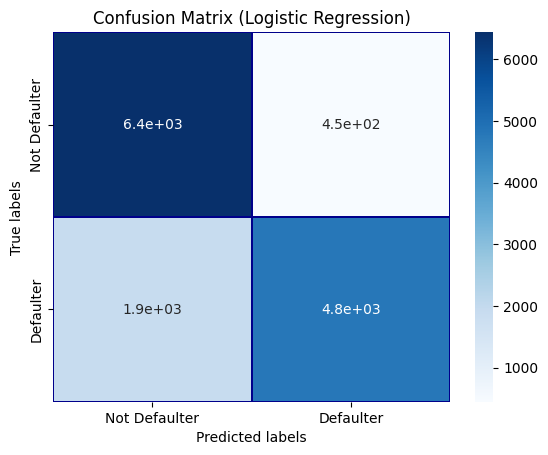

In [44]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, lr_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Logistic Regression)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

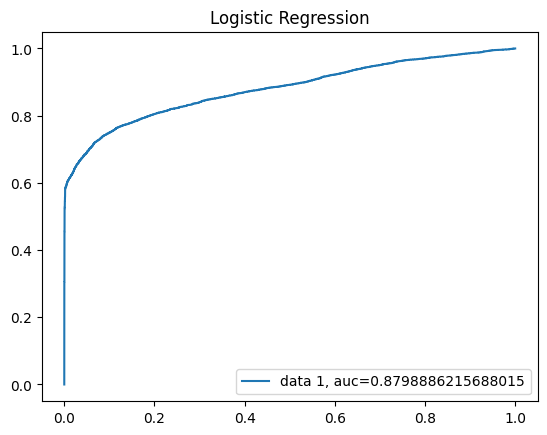

In [45]:
y_preds_proba_lr = optimized_lr.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.show()

# Decision Tree


1. **`DecisionTreeClassifier(max_depth=8, max_features=15, random_state=42)`**:
    - **`DecisionTreeClassifier`** 是一種常用於分類問題的決策樹模型。
    - **`max_depth=8`**: 這個參數限制了樹的最大深度。在這裡設為8意味著樹可以分裂成最多8層。控制樹的深度有助於防止過擬合。
    - **`max_features=15`**: 這表示在尋找最佳分割時，每次只考慮15個特徵。這可以提高訓練速度，同時也有助於防止過擬合。
    - **`random_state=42`**: 這是隨機數生成器的種子。設定這個值確保了結果的可重現性。

### **訓練過程**

1. **`dt.fit(X_train, y_train)`**:
    - **`fit`** 方法用於在訓練數據集（**`X_train`**, **`y_train`**）上訓練模型。
    - **`X_train`** 包含了訓練數據的特徵，而 **`y_train`** 是相應的標籤。

### **模型評估**

1. **`print(dt.score(X_test, y_test))`**:
    - **`score`** 方法用於評估模型在測試數據集（**`X_test`**, **`y_test`**）上的表現。
    - 它返回的是模型的準確率，即模型正確預測的標籤佔總標籤的比例。
    - 這一步是檢查模型在未見數據上的泛化能力的關鍵。

### **總結**

這段代碼展示了使用決策樹進行分類的基本流程：模型初始化、訓練和性能評估。決策樹是一種直觀且常用的分類方法，它通過樹狀結構來進行決策，每個節點代表一個特徵的檢查，而每個分支則代表一個決策方向。

理解這一過程對於數據分析學生至關重要，因為它提供了關於如何訓練、調整參數以及評估機器學習模型的基礎知識。此外，理解不同參數（如 **`max_depth`** 和 **`max_features`**）對模型性能的影響是進行有效模型調優的關鍵。

In [47]:
dt = DecisionTreeClassifier(max_depth=8, max_features=15, random_state=42)
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.8196395733725634


In [55]:
param_dt = {
    # 'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'max_depth': range(5, 15),  # Maximum depth of each tree
    # Minimum number of samples required to split an internal node
    'min_samples_split': range(2, 10),
    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': range(1, 4),
    'max_features': range(5, 18)
}
# param_dt = {
#     'max_depth': [5, 10, 15],  # Maximum depth of each tree
#     # Minimum number of samples required to split an internal node
#     'min_samples_split': [2, 5, 10],
#     # Minimum number of samples required to be at a leaf node
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [5, 10, 15, 18]
# }


grid_dt = GridSearchCV(estimator=dt, param_grid=param_dt,
                       cv=4, scoring='accuracy', n_jobs=-1, verbose=1)

grid_dt.fit(X_train, y_train)

Fitting 4 folds for each of 3120 candidates, totalling 12480 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=8, max_features=15,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15),
                         'max_features': range(5, 18),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy', verbose=1)

In [56]:
optimized_dt = grid_dt.best_estimator_

In [57]:
grid_dt.best_score_

0.8266447940091105

In [58]:
grid_dt.best_params_

{'max_depth': 10,
 'max_features': 17,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [59]:
dt_train_pred = optimized_dt.predict(X_train)
dt_test_pred = optimized_dt.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("The accuracy on train data is ", accuracy_score(dt_train_pred, y_train))
print("The accuracy on test data is ", accuracy_score(dt_test_pred, y_test))
print("The precision on test data is ", precision_score(dt_test_pred, y_test))
print("The recall on test data is ", recall_score(dt_test_pred, y_test))
print("The f1 on test data is ", f1_score(dt_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(dt_test_pred, y_test))

The accuracy on train data is  0.8587055893572082
The accuracy on test data is  0.8336888561971313
The precision on test data is  0.7754249925439904
The recall on test data is  0.873215785054576
The f1 on test data is  0.8214201089961299
The roc_score on test data is  0.8380476831032042


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

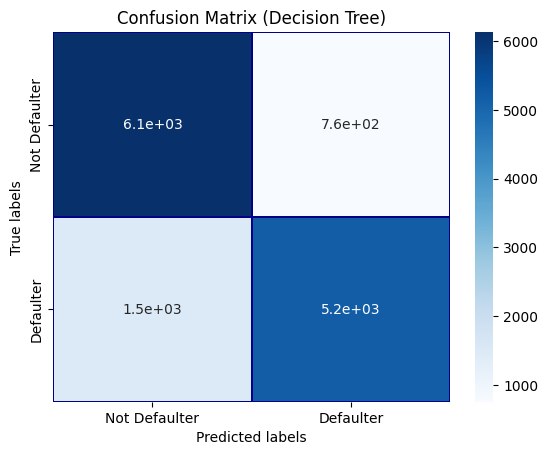

In [61]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, dt_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Decision Tree)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

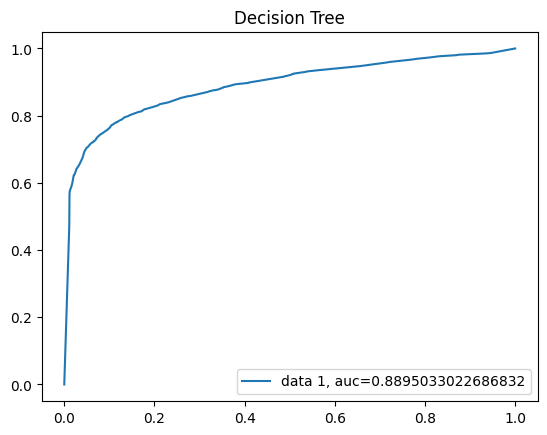

In [62]:
y_preds_proba_dt = optimized_dt.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_dt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Decision Tree')
plt.legend(loc=4)
plt.show()

# Random Forest

### **隨機森林分類器（RandomForestClassifier）**

1. **創建模型**:
    - **`RandomForestClassifier(max_depth=10, max_features=15, random_state=42)`** 創建了一個隨機森林分類器的實例。
    - **`max_depth=10`**: 這個參數限制了每棵樹的最大深度。設定深度可以幫助防止過擬合，因為過深的樹可能會學習到訓練數據的噪聲。
    - **`max_features=15`**: 指每次分裂時考慮的最大特徵數。這可以幫助提高模型的多樣性，減少樹與樹之間的相關性，並提高泛化能力。
    - **`random_state=42`**: 確保每次運行代碼時結果的一致性，方便調試和比較。
2. **訓練模型**:
    - **`rf.fit(X_train, y_train)`**: 這一步將模型與訓練數據（**`X_train`** 和 **`y_train`**）進行擬合。**`X_train`** 包含了訓練數據的特徵，而 **`y_train`** 是相應的標籤。
3. **評估模型**:
    - **`print(rf.score(X_test, y_test))`**: 這行代碼評估了模型在測試數據集（**`X_test`**, **`y_test`**）上的表現。
    - **`score`** 方法返回的是準確率，即模型正確預測的標籤佔總標籤的比例。
    - 這一步驗證了模型在未見過的數據上的泛化能力。

### **隨機森林的優點**

隨機森林是一種集成學習方法，它通過組合多棵決策樹來提高模型的穩定性和準確性。它的主要優點包括：

- **泛化能力強**：通過平均多棵樹的預測，減少了模型的方差，使得模型對於未見數據有更好的泛化能力。
- **過擬合風險低**：相對於單一的決策樹，隨機森林更不容易過擬合。
- **特徵選擇的靈活性**：在每次分裂過程中考慮的隨機特徵子集，使得隨機森林可以更好地處理具有大量特徵的數據集。

In [63]:
rf = RandomForestClassifier(max_depth=10, max_features=15, random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.8506068407502758


### **`max_depth` 的意義與影響**

1. **意義**:
    - **`max_depth`** 參數指定了決策樹的最大深度，即樹可以生長的最大層數。
    - 深度限制了從根節點到最遠葉節點的最長路徑。
2. **對模型的影響**:
    - **防止過擬合**：較小的 **`max_depth`** 可以防止樹過於複雜，這有助於減少過擬合的風險。過深的樹可能會學習到訓練數據中的噪聲。
    - **影響模型複雜度**：較大的深度允許模型學習更細分的模式，但也可能導致模型在訓練數據上過度擬合，從而影響其在新數據上的表現。
    - **平衡準確度和泛化能力**：適當的 **`max_depth`** 需要根據具體問題進行調整，以平衡訓練準確度和泛化能力。

### **`max_features` 的意義與影響**

1. **意義**:
    - **`max_features`** 決定了在分裂決策樹節點時，每次隨機選擇的特徵數量的上限。
    - 這個參數可以是整數（直接指定特徵數量）、浮點數（作為特徵總數的比例）、**`"auto"`**（等於特徵數）、**`"sqrt"`**（特徵數的平方根）或 **`"log2"`**（以2為底的特徵數對數）。
2. **對模型的影響**:
    - **提高隨機性**：在隨機森林中，較小的 **`max_features`** 增加了模型中各個樹之間的差異，提高了整體模型的隨機性，從而可能提高其泛化能力。
    - **防止過擬合**：這個參數有助於減少模型對單一特徵的依賴，從而降低過擬合的風險。
    - **影響訓練速度**：較小的 **`max_features`** 可以加快訓練速度，因為在每次分裂時需要評估的特徵數量減少了。
    - **平衡特徵與決策的重要性**：適當的 **`max_features`** 值有助於平衡在決策過程中考慮的特徵數量和模型的預測能力。

In [69]:
param_grid = {
    'n_estimators': [100, 200, 300, 350],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [5, 10, 15, 18]
}
# param_grid = {
#     'n_estimators': range(300, 300),  # Number of trees in the forest
#     'max_depth': range(5, 15),  # Maximum depth of each tree
#     # 'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': range(5, 18)
# }

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=4, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV 2/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.800 total time=   2.9s
[CV 1/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.797 total time=   3.2s
[CV 4/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.790 total time=   3.2s
[CV 3/4] END max_depth=5, max_features=5, n_estimators=100;, score=0.807 total time=   3.2s
[CV 4/4] END max_depth=5, max_features=10, n_estimators=100;, score=0.786 total time=   5.1s
[CV 2/4] END max_depth=5, max_features=10, n_estimators=100;, score=0.799 total time=   5.2s
[CV 2/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.799 total time=   5.8s
[CV 1/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.794 total time=   6.0s
[CV 3/4] END max_depth=5, max_features=5, n_estimators=200;, score=0.808 total time=   6.3s
[CV 3/4] END max_depth=5, max_features=10, n_estimators=100;, score=0.805 total time=   6.4s
[CV 1/4] END ma

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=10, max_features=15,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [5, 10, 15, 18],
                         'n_estimators': [100, 200, 300, 350]},
             scoring='accuracy', verbose=3)

In [70]:
optimized_rf = grid_search.best_estimator_

In [72]:
grid_search.best_score_

0.8600295892234456

In [73]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 15, 'n_estimators': 300}

In [74]:
rf_train_pred = optimized_rf.predict(X_train)
rf_test_pred = optimized_rf.predict(X_test)

In [75]:
print("The accuracy on train data is ", accuracy_score(rf_train_pred, y_train))
print("The accuracy on test data is ", accuracy_score(rf_test_pred, y_test))
print("The precision on test data is ", precision_score(rf_test_pred, y_test))
print("The recall on test data is ", recall_score(rf_test_pred, y_test))
print("The f1 on test data is ", f1_score(rf_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(rf_test_pred, y_test))

The accuracy on train data is  0.9490243056650168
The accuracy on test data is  0.8656859139389481
The precision on test data is  0.8095735162541008
The recall on test data is  0.9081632653061225
The f1 on test data is  0.8560391043834753
The roc_score on test data is  0.8702559795087786


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

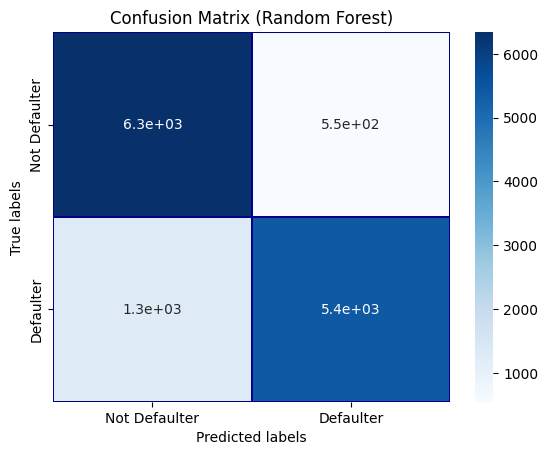

In [76]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, rf_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Random Forest)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

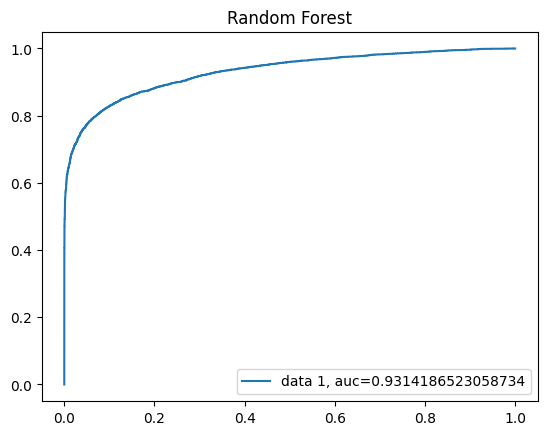

In [77]:
y_preds_proba_rf = optimized_rf.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('Random Forest')
plt.legend(loc=4)
plt.show()

# XGBoost

### **基本概念**

1. **梯度提升（Gradient Boosting）**:
    - XGBoost 屬於梯度提升的家族。梯度提升是一種機器學習技術，它逐步建立模型，每一步都試圖糾正前一步的錯誤。
    - 基本思想是結合多個簡單的模型（如決策樹），每個模型都專注於改進前一個模型的不足之處。
2. **梯度提升決策樹（GBDT）**:
    - XGBoost 使用決策樹作為基學習器（weak learner）。這些樹是按順序一個接一個建立的，每棵新樹的建立都基於之前樹的結果。

### **XGBoost 的特點**

1. **效率和靈活性**:
    - XGBoost 在計算上非常高效。它使用了一些先進的技術，如樹剪枝（tree pruning）、正則化（regularization）和分布式計算，以提高速度和效率。
    - 它非常靈活，支持自定義優化目標和評估標準。
2. **正則化**:
    - XGBoost 在梯度提升的基礎上增加了正則化項（L1 和 L2 正則化），這有助於避免過擬合，提高模型的泛化能力。
3. **處理缺失值**:
    - XGBoost 能自動處理缺失值的問題。在訓練過程中，它會學習缺失值應該如何處理。
4. **樹剪枝**:
    - 與傳統的梯度提升方法不同，XGBoost 從最大深度開始生長樹，然後進行剪枝。這種「深度優先」的方法有助於減少過擬合的風險。
5. **內建交叉驗證**:
    - XGBoost 可以在每一輪迭代過程中進行交叉驗證，這使得模型的調參和評估更加簡單高效。
6. **多線程和分布式處理**:
    - XGBoost 支持多線程，這意味著它可以利用多核 CPU 進行快速計算。它還支持分布式計算，可以處理大型數據集。

### **XGBoost 和 `XGBClassifier`**

- **XGBoost** 是一種基於梯度提升決策樹的機器學習算法，廣泛用於分類問題，尤其是在具有高維特徵的數據集上表現出色。
- **`XGBClassifier(objective='binary:logistic')`**:
    - 這是創建 XGBoost 分類器的步驟，用於二元分類。
    - **`objective='binary:logistic'`** 指定了損失函數的類型，適用於二元分類問題。

### **GridSearchCV 參數優化**

- **`GridSearchCV`** 是一種系統化尋找最佳參數（hyperparameters）組合的方法，用於提升模型性能。
- **參數解釋**:
    - **`estimator=xgb`**: 指定要優化的模型。
    - **`param_grid=parm_xgb`**: 指定要嘗試的參數範圍。在這裡，有三個參數：
        - **`max_depth`**: 決策樹的最大深度。
        - **`n_estimators`**: 模型中梯度提升樹的數量。
        - **`learning_rate`**: 每棵樹對最終結果的貢獻率，也稱為步長。
    - **`scoring='accuracy'`**: 評估模型性能的指標，這裡使用準確度。
    - **`cv=5`**: 交叉驗證的折數，這裡使用5折交叉驗證。
    - **`n_jobs=-1`**: 使用所有可用的 CPU 核心進行計算。
    - **`verbose=3`**: 表示顯示詳細的進度信息。

### **模型訓練與結果**

- **`grid_result = grid_xgb.fit(X_train, y_train)`**:
    - 這一步將 **`GridSearchCV`** 應用於訓練數據集，開始尋找最佳參數組合。
    - **`X_train`** 和 **`y_train`** 分別是特徵數據和目標標籤。
    - **`grid_result`** 保存了優化過程的結果，包括最佳參數、最佳模型等。

In [78]:
xgb = XGBClassifier(objective='binary:logistic')
parm_xgb = {'max_depth': [15, 18, 22, 25], 'n_estimators': [
    250, 300, 400], 'learning_rate': [0.01, 0.05, 0.1]}
grid_xgb = GridSearchCV(estimator=xgb, param_grid=parm_xgb,
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_result = grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 2/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.860 total time= 1.7min
[CV 5/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.853 total time= 1.7min
[CV 1/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.860 total time= 1.8min
[CV 2/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.863 total time= 1.8min
[CV 5/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.857 total time= 1.9min
[CV 4/5] END learning_rate=0.01, max_depth=15, n_estimators=250;, score=0.863 total time= 1.9min
[CV 3/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.856 total time= 1.9min
[CV 1/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.862 total time= 2.0min
[CV 4/5] END learning_rate=0.01, max_depth=15, n_estimators=300;, score=0.863 total time= 2.1min
[CV 3/5] END learning_rate=0.01, max_depth=15, n_estimators=250;,

In [79]:
optimized_xgb = grid_xgb.best_estimator_

In [80]:
grid_xgb.best_score_

0.8739006297220457

In [81]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 300}

In [82]:
xgb_train_pred = optimized_xgb.predict(X_train)
xgb_test_pred = optimized_xgb.predict(X_test)

In [83]:
y_train.shape

(31721,)

In [84]:
print("The accuracy on train data is ",
      accuracy_score(xgb_train_pred, y_train))
print("The accuracy on test data is ", accuracy_score(xgb_test_pred, y_test))
print("The precision on test data is ", precision_score(xgb_test_pred, y_test))
print("The recall on test data is ", recall_score(xgb_test_pred, y_test))
print("The f1 on test data is ", f1_score(xgb_test_pred, y_test))
print("The roc_score on test data is ", roc_auc_score(xgb_test_pred, y_test))

The accuracy on train data is  0.9995271271397497
The accuracy on test data is  0.8780433983082016
The precision on test data is  0.8396957948106174
The recall on test data is  0.9061795944641133
The f1 on test data is  0.871671826625387
The roc_score on test data is  0.8802676864069653


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

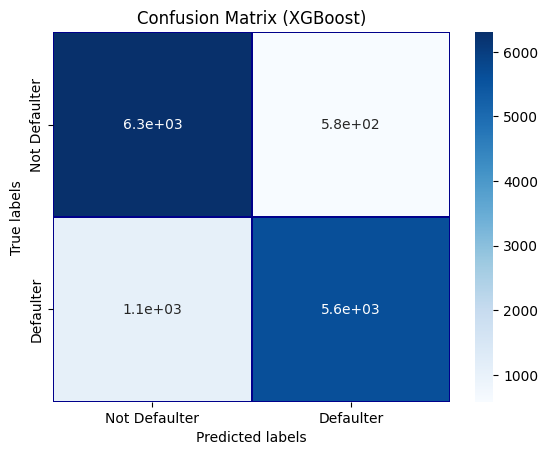

In [85]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, xgb_test_pred)


ax = plt.subplot()
sns.heatmap(cm,
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True, ax=ax,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (XGBoost)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

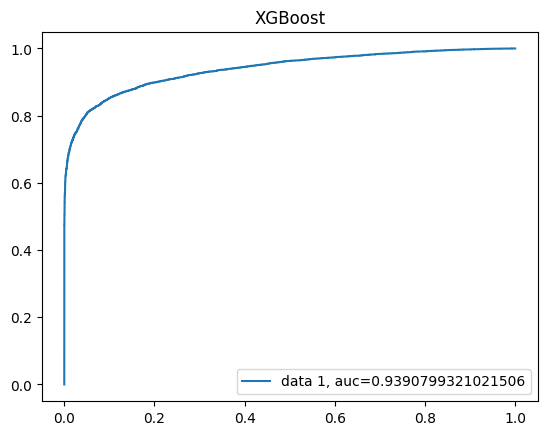

In [86]:
y_preds_proba_xgb = optimized_xgb.predict_proba(X_test)[::, 1]
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.title('XGBoost')
plt.legend(loc=4)
plt.show()

### **特徵重要性提取**

- **`feature_importances_xgb = pd.DataFrame(optimized_xgb.feature_importances_, index=columns, columns=['importance_xgb']).sort_values('importance_xgb', ascending=False)[:20]`**:
    - **`optimized_xgb.feature_importances_`** 獲取了 XGBoost 模型中各個特徵的重要性。這些值表示每個特徵對於模型的預測能力貢獻的相對重要性。
    - 這些重要性值被轉換成了一個 Pandas DataFrame，其中 **`index=columns`** 指定了每個特徵的名稱。
    - **`.sort_values('importance_xgb', ascending=False)`** 對特徵按其重要性進行降序排序。
    - **`[:20]`** 選取了前20個最重要的特徵。

### **數據可視化**

- **使用 Matplotlib 繪製條形圖**:
    - **`plt.subplots(figsize=(17, 6))`**: 創建一個圖形和一個子圖，設定圖形大小為寬17英寸、高6英寸。
    - **`plt.title("Feature importances from XGBoost")`**: 給圖形添加標題。
    - **`plt.bar(...)`**: 繪製條形圖，展示每個特徵的重要性。**`feature_importances_xgb.index`** 和 **`feature_importances_xgb['importance_xgb']`** 分別提供了 X 軸（特徵名稱）和 Y 軸（重要性值）的數據。
    - **`plt.xticks(...)`**: 設置 X 軸的刻度標籤，並將其旋轉 45 度，以便於閱讀。
    - **`plt.show()`**: 顯示圖表。

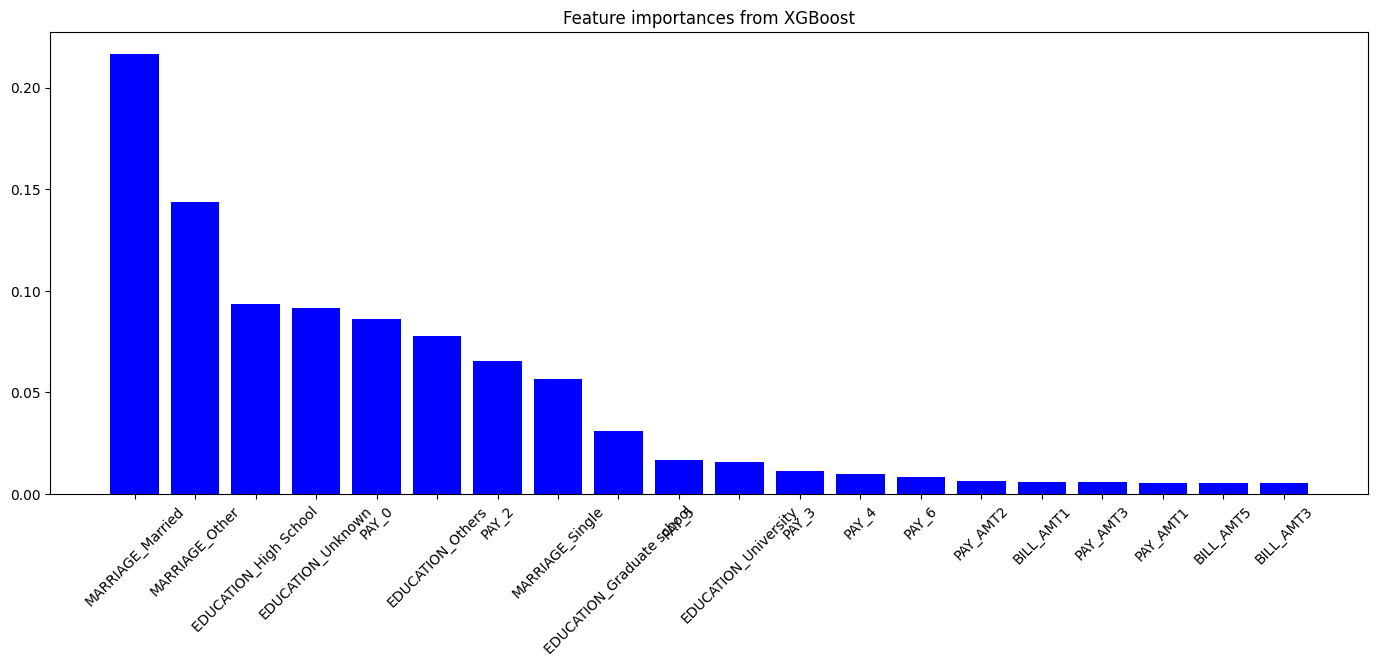

In [87]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimized_xgb.feature_importances_,
                                       index=columns,
                                       columns=['importance_xgb']).sort_values('importance_xgb',
                                                                               ascending=False)[:20]

plt.subplots(figsize=(17, 6))
plt.title("Feature importances from XGBoost")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation=45)
# plt.xlim([-1, X.shape[1]])
plt.show()